In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
def pie_plot(data, column):
    data[column].value_counts().plot.pie(autopct='%1.1f%%')

# plot count chart
def count_plot(rotx, roty, data_name, column_name, hue = False, plot_size = (10, 5), hue_column_name=None):
  
    plt.figure(figsize = plot_size)
    plt.xticks(rotation=rotx, fontsize=14)
    plt.yticks(rotation=roty, fontsize=10)
    sns.set_style("whitegrid")
    if not hue:
        ax = sns.countplot(column_name, data=data_name, palette='husl',
                      order = np.sort(data_name[column_name].unique()))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(data_name))
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')
    else:
        ax = sns.countplot(column_name, data=data_name, 
                      palette='husl', hue = hue_column_name,
                      order = data_name[column_name].value_counts().index)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(data_name))
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='center')
    sns.despine()

#plot stack chart
def stacked_plot(data, column_one, column_two, agg_column):
    df = data.groupby([column_one, column_two]).agg({agg_column:'count'}).reset_index()

    df['Percentual'] = df.apply(lambda x:  round(100 * (x[agg_column] / df[df[column_one] == x[column_one]][agg_column].sum()),2), axis=1)

    fig = px.bar(df, x=column_one, y="Percentual", text="Percentual", color=column_two,
            hover_data=['Percentual'], barmode = 'stack', template="seaborn")

    fig.update_layout(
        margin=dict(l=20, r=50, t=50, b=20),
        xaxis_title=column_one,
        yaxis_title="Percentual [%]",
        width=700, 
        height=500,
        uniformtext_minsize=9, 
        uniformtext_mode='hide',
    )
    fig.show()

### Import Data

In [3]:
# code_module          identification code of the module, to which the assessment belongs
# code_presentation    identification code of the presentation, to which the assessment belongs
# id_assessment        identification number of the assessment
# assessment_type      type of assessment
# date                 days information about the final submission date of the assessment calculated as the number of days 
#                      since the start of the module-presentation. The starting date of the presentation has number 0 (zero)
# weight               weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%
#                      the sum of all other assessments is 100%

assessment = pd.read_csv('C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\assessments.csv')
assessment

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [4]:
df_ass = pd.DataFrame(assessment.info())
df_ass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


""


In [5]:
assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [6]:
assessment[assessment["code_module"] == "GGG"]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
176,GGG,2013J,37418,CMA,229.0,0.0
177,GGG,2013J,37419,CMA,229.0,0.0
178,GGG,2013J,37420,CMA,229.0,0.0
179,GGG,2013J,37421,CMA,229.0,0.0
180,GGG,2013J,37422,CMA,229.0,0.0
181,GGG,2013J,37423,CMA,229.0,0.0
182,GGG,2013J,37415,TMA,61.0,0.0
183,GGG,2013J,37416,TMA,124.0,0.0
184,GGG,2013J,37417,TMA,173.0,0.0
185,GGG,2013J,37424,Exam,229.0,100.0


In [7]:
# TMA: Tutor Marked Assessment
# CMA: Computer Marked Assessment
# Exam: Final Exam

assessment["assessment_type"].unique()

array(['TMA', 'Exam', 'CMA'], dtype=object)

In [8]:
assessment.isnull().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [9]:
# Tất cả những giá trị bị missing ở cột "date" đều có assessment_type = "Exam" 
# có date nằm trong khoảng (222,261)  nên có thể thay bằng giá trị 235
# assessment['date'] = assessment['date'].fillna(assessment['date'].mode())

In [10]:
# code_module         name of the module, which serves as the identifier
# code_presentation   name of the presentation. It consists of the year and B for the presentation 
#                     starting in February and J for the presentation starting in October
# length              length of the module presentation in days

courses = pd.read_csv('C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\courses.csv')
courses

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [11]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [12]:
assessment = assessment.merge(courses, on = ["code_module","code_presentation"], how = "left")
idx = assessment[assessment["date"].isnull()].index
for id in idx:
    assessment.loc[id, "date"] = assessment.loc[id, "module_presentation_length"],
assessment = assessment.drop("module_presentation_length", axis = 1)

Bảng dữ liệu không có giá trị bị null

In [13]:

# id_assessment            the identification number of the assessment
# id_student               a unique identification number for the student
# date_submitted           the date of student submission, measured as the number of days 
#.                         since the start of the module presentation
# is_banked                a status flag indicating that the assessment result has been transferred from a previous presentation
# score                    the studentís score in this assessment. The range is from 0 to 100. The score lower than 40 is 
#                          interpreted as Fail. The marks are in the range from 0 to 100

std_assesment = pd.read_csv('C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\studentAssessment.csv')
std_assesment

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [14]:
std_assesment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [15]:
std_assesment.isnull().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

Cột "score" có 173 giá trị Null được thay thể bằng mean

In [16]:
std_assesment["score"] = std_assesment["score"].fillna(int(std_assesment["score"].mean()))

In [17]:
# code_module             an identification code for a module
# code_presentation       the identification code of the presentation
# id_student              a unique identification number for the student
# date_registration       the date of student's registration on the module presentation, this is the number of days measured relative to 
#                         the start of the module-presentation (e.g. the negative value -30 means that the student registered to module
#                         presentation 30 days before it started)
# date_unregistration     date of student unregistration from the module presentation, this is the number of days measured relative to 
#                         the start of the module-presentation. Students, who completed the course have this field empty. Students who 
#                         unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file

reg_std = pd.read_csv('C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\studentRegistration.csv')
reg_std

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


In [18]:
reg_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [19]:
# Những giá trị trong cột "date_registration" có giá trị âm theo quy ước và được đưa về giá trị 
# tuyệt đối, những giá trị >= 0 được gán là Null, sau đó chuyển về trị tuyệt đối để thuận lợi cho việc phân tích

reg_std["date_registration"] = [None if date >= 0 else abs(date) for date in reg_std["date_registration"]]

In [20]:
## 0 : 'COMPLETED': học viên hoành thành  
## 1 : 'WITHDRAWN': học viên rút khỏi khóa học(không hoàn thành)
reg_std['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in reg_std['date_unregistration']]

# # Thay giá trị Null bằng mean
# reg_std['date_registration'] = reg_std['date_registration'].fillna(int(reg_std['date_registration'].mode()))

có gần 31% học viên đăng kí rút chưa hoàn thành môn học

In [21]:
# code_module             an identification code for a module on which the student is registered
# code_presentation       the identification code of the presentation during which the student is registered on the module
# id_student              a unique identification number for the student
# gender                  the studentís gender
# region                  identifies the geographic region, where the student lived while taking the module-presentation
# highest_education       highest student education level on entry to the module presentation
# imd_band                specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation
# age_band                band of the studentís age
# num_of_prev_attempts    the number times the student has attempted this module
# studied_credits         the total number of credits for the modules the student is currently studying
# disability              indicates whether the student has declared a disability
# final_result            studentís final result in the module-presentation

info_std = pd.read_csv('C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\studentInfo.csv')
info_std

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [22]:
info_std["imd_band"].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [23]:
info_std["imd_band"] = ["10-20%" if imd == "10-20" else imd for imd in info_std["imd_band"]]

<AxesSubplot:xlabel='studied_credits'>

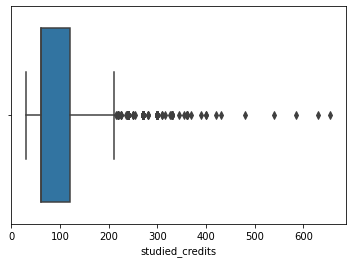

In [24]:
sns.boxplot(info_std["studied_credits"])

In [25]:
info_std["studied_credits"].describe()

count    32593.000000
mean        79.758691
std         41.071900
min         30.000000
25%         60.000000
50%         60.000000
75%        120.000000
max        655.000000
Name: studied_credits, dtype: float64

boxplot thể hiện tổng số tín chỉ học phần của học viên. Dựa trên biểu đồ và thống kê thấy răng, có học viên có tổng chỉ lớn hơn 600, những giá trị này sẽ đc xóa và coi là missing

In [26]:
# Loại bỏ những giá trị tín chỉ bị sai
for x in ['studied_credits']:
    q75,q25 = np.percentile(info_std.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    info_std.loc[info_std[x] < min,x] = np.nan
    info_std.loc[info_std[x] > max,x] = np.nan

In [27]:
# code_module           an identification code for a module
# code_presentation     the identification code of the module presentation
# id_student            a unique identification number for the student
# id_site               an identification number for the VLE material
# date                  the date of studentís interaction with the material measured as the 
#                       number of days since the start of the module-presentation
# sum_click             the number of times a student interacts with the material in that day 

vle_std = pd.read_csv("C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\studentVle.csv")
vle_std

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [28]:
# id_site              an identification number of the material
# code_module          an identification code for module
# code_presentation    the identification code of presentation
# activity_type        the role associated with the module material
# week_from            the week from which the material is planned to be used
# week_to              week until which the material is planned to be used

vle = pd.read_csv("C:\\Users\\HUY LOL\\Downloads\\OULAD\\Data\\vle.csv")
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [29]:
vle.isnull().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [30]:
# có gần 80% giá trị bị thiếu trong các cột "week_from", "week_to" nên sẽ bị xóa
vle = vle.drop(['week_from', 'week_to'], axis = 1)

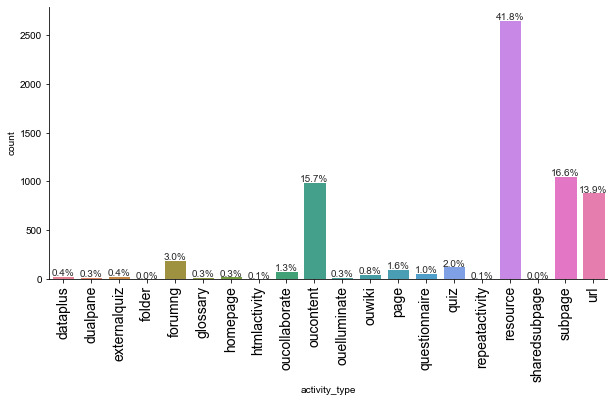

In [31]:
# Vẽ biểu đồ thống kế các loại tài liệu
count_plot(90, 0, vle, 'activity_type')

Nhận xét: Từ biểu đồ cho thấy tài liệu có "activity_type" = resource có chiếm nhiều nhất (41.8%), tiêps theo là subpage 16,6%, oucontent 15.7%, url 13.9%.



# Tiếp theo, kết hợp các bảng dữ liệu dựa theo liên kết cơ sở dữ liệu để phân tích mối quan hệ giữa các bảng: 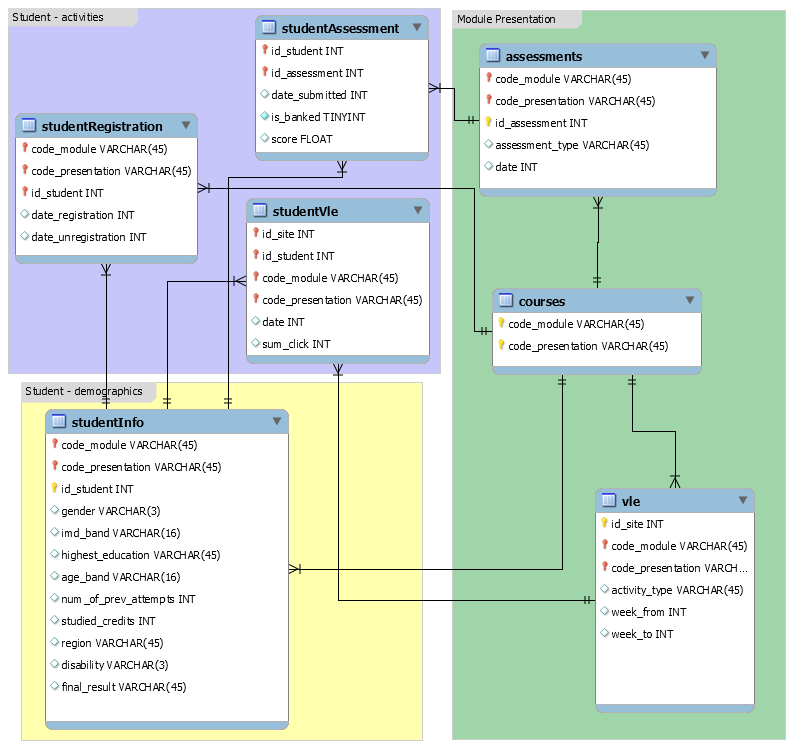

### Kết hợp vle_std vơi vle cho thấy sự tương tác của học viên với VLE

In [32]:
vle_std_merge_vle = vle_std.merge(vle, on=['id_site', 'code_module', 'code_presentation'], how = 'left')
vle_std_merge_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage
10655276,GGG,2014J,675578,896943,269,1,homepage
10655277,GGG,2014J,654064,896943,269,3,homepage
10655278,GGG,2014J,654064,896939,269,1,forumng


Nhận thấy rằng có những học viên tương tác với tài liệu từ trước khi khóa học bắt đầu. Tính số lượt tương tác của học viên với VLE phân tích ý thức học tập của học viên 

In [33]:
# kết hợp 2 bảng dữ liệu
vle_std_merge_vle = vle_std.merge(vle, on=['id_site', 'code_module', 'code_presentation'], how = 'left')
# Xác định học viên tương tác với tài liệu trước hay sau khi khóa học bắt đầu
vle_std_merge_vle['Click_Timing'] = ["Before" if day < 0 else "After" for day in vle_std_merge_vle["date"]]
# Group by tính số lần học viên tương tác trước và sau với VLE
vle_std_merge_vle["After_Click"] = np.where(vle_std_merge_vle['Click_Timing'] == 'After', vle_std_merge_vle["sum_click"], 0 )
vle_std_merge_vle["Before_Click"] = np.where(vle_std_merge_vle['Click_Timing'] == 'Before', vle_std_merge_vle["sum_click"], 0 )
vle_std_merge_vle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,Click_Timing,After_Click,Before_Click
0,AAA,2013J,28400,546652,-10,4,forumng,Before,0,4
1,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
2,AAA,2013J,28400,546652,-10,1,forumng,Before,0,1
3,AAA,2013J,28400,546614,-10,11,homepage,Before,0,11
4,AAA,2013J,28400,546714,-10,1,oucontent,Before,0,1
...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,After,3,0
10655276,GGG,2014J,675578,896943,269,1,homepage,After,1,0
10655277,GGG,2014J,654064,896943,269,3,homepage,After,3,0
10655278,GGG,2014J,654064,896939,269,1,forumng,After,1,0


In [34]:
vle_std_merge_vle_group = vle_std_merge_vle.groupby(["code_module", "code_presentation", "id_student"], as_index = False)["sum_click", "After_Click", "Before_Click"].sum()
vle_std_merge_vle_group

,code_module,code_presentation,id_student,sum_click,After_Click,Before_Click
0,AAA,2013J,11391,934,836,98
1,AAA,2013J,28400,1435,1220,215
2,AAA,2013J,30268,281,179,102
3,AAA,2013J,31604,2158,1989,169
4,AAA,2013J,32885,1034,739,295
...,...,...,...,...,...,...
29223,GGG,2014J,2640965,41,39,2
29224,GGG,2014J,2645731,893,893,0
29225,GGG,2014J,2648187,312,297,15
29226,GGG,2014J,2679821,275,210,65


In [35]:
std_access_vle = len(vle_std_merge_vle_group["id_student"].unique())
print("Số học viên có truy cập tài liệu: ", std_access_vle)
total_std = len(info_std["id_student"].unique())
print("Tổng số học viên: ", total_std)
print("% sinh viên: ", std_access_vle / total_std * 100)

Số học viên có truy cập tài liệu:  26074
Tổng số học viên:  28785
% sinh viên:  90.58190029529268


In [36]:
# Có khoảng 90% tương tác với tài liệu các module môn học, tạo thông tin để đánh dâu sinh viên
# có sử dụng tài liệu
vle_std_merge_vle_group["Access_Vle"] = "Yes"

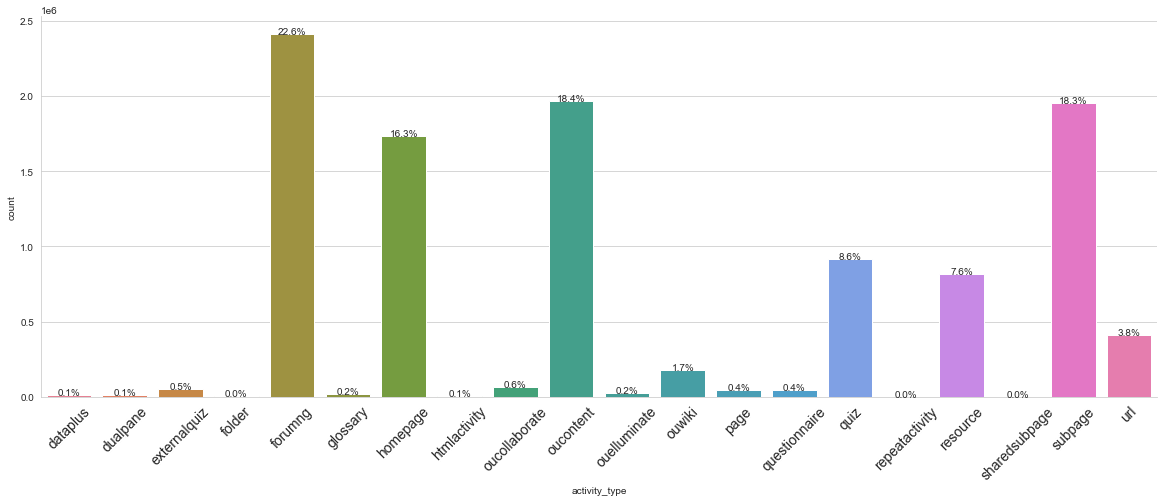

In [37]:
# Biểu đồ cách thức tương tác của học viên với VLE
count_plot(45, 0,vle_std_merge_vle, 'activity_type', plot_size=(20, 7))

Nhận xét: Dựa theo biểu đồ, thấy rằng cách học viên tương tác với các nguôn tài liệu qua Forumng 22.6% lớn nhất, tiếp theo Oucotent, Subpage, Homepage lần lượt 18.4%, 18.3%, 16.3%. Có một số không được sử dụng

<AxesSubplot:xlabel='activity_type'>

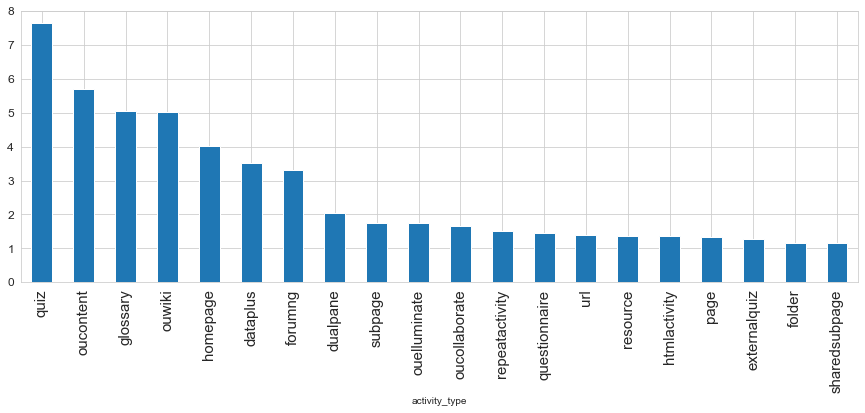

In [38]:
# Biểu đồ thể hiện sự tương tác trung bình của 1 học viên với từng tài liệu
plt.figure(figsize = (15, 5))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
vle_std_merge_vle.groupby(['activity_type'], as_index=True)['sum_click'].mean().sort_values(ascending=False).plot(kind='bar')

### Tiếp theo kết hợp hai bảng reg_std và course để tìm hiểu mối liên quan giữa đăng ký và thời gian khóa học

In [39]:
reg_std_merge_course = reg_std.merge(courses, on = ["code_module", "code_presentation"], how = "left")
reg_std_merge_course

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length
0,AAA,2013J,11391,159.0,0,268
1,AAA,2013J,28400,53.0,0,268
2,AAA,2013J,30268,92.0,1,268
3,AAA,2013J,31604,52.0,0,268
4,AAA,2013J,32885,176.0,0,268
...,...,...,...,...,...,...
32588,GGG,2014J,2640965,4.0,0,269
32589,GGG,2014J,2645731,23.0,0,269
32590,GGG,2014J,2648187,129.0,0,269
32591,GGG,2014J,2679821,49.0,1,269


In [40]:
reg_std_merge_course["Year"] = reg_std_merge_course["code_presentation"].str[0:4]
reg_std_merge_course["Starting_month"] = ["February" if cod_pre[-1] == "J" else "October"
                                          for cod_pre in reg_std_merge_course["code_presentation"]]

### ở bước tiếp theo, kết hợp bảng assessment vs std_assessment đẻ đánh giá kết quá học tập hoc viên

In [41]:
std_assessment_merge_assessment = std_assesment.merge(assessment, on = "id_assessment", how = "left")
std_assessment_merge_assessment

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [42]:
std_assessment_merge_assessment["date"] = std_assessment_merge_assessment["date"].fillna(235)

In [43]:
# Coó những học viên nộp bài muộn so với thời hạn:
# 1 - nộp bài muộn
# 0 - không nộp bài muộn

std_assessment_merge_assessment['Late_submission'] = [1 if int(std_assessment_merge_assessment['date_submitted'].iloc[index] > int(std_assessment_merge_assessment['date'].iloc[index])) 
                                                    else 0  for index in range(std_assessment_merge_assessment.shape[0])]

In [44]:
# Thống kê tổng số lần nộp bài muộn
Submission = std_assessment_merge_assessment.groupby(["code_module","code_presentation","id_student"], as_index= False)["Late_submission"].sum()
Submission

,code_module,code_presentation,id_student,Late_submission
0,AAA,2013J,11391,0
1,AAA,2013J,28400,2
2,AAA,2013J,31604,0
3,AAA,2013J,32885,5
4,AAA,2013J,38053,1
...,...,...,...,...
25838,GGG,2014J,2620947,1
25839,GGG,2014J,2645731,2
25840,GGG,2014J,2648187,0
25841,GGG,2014J,2679821,0


In [45]:
std_assessment_merge_assessment['Late_submission'] = ["Yes" if Late == 1 else "No" for Late in std_assessment_merge_assessment['Late_submission']]

Kết hợp bảng student_info với vle_std_merge_vle_group

In [46]:
student_info = info_std.merge(vle_std_merge_vle_group, on = ['code_module', 'code_presentation', 'id_student'],how = 'left')
student_info
# student_info['sum_click']     = student_info['sum_click'].fillna(student_info['sum_click'].mean())
# student_info['After_Click']  = student_info['After_Click'].fillna(student_info['After_Click'].mean())
# student_info['Before_Click'] = student_info['Before_Click'].fillna(student_info['Before_Click'].mean())

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,After_Click,Before_Click,Access_Vle
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,NaN,N,Pass,934.0,836.0,98.0,Yes
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60.0,N,Pass,1435.0,1220.0,215.0,Yes
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60.0,Y,Withdrawn,281.0,179.0,102.0,Yes
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60.0,N,Pass,2158.0,1989.0,169.0,Yes
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60.0,N,Pass,1034.0,739.0,295.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30.0,N,Fail,41.0,39.0,2.0,Yes
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30.0,N,Distinction,893.0,893.0,0.0,Yes
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30.0,Y,Pass,312.0,297.0,15.0,Yes
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30.0,N,Withdrawn,275.0,210.0,65.0,Yes


kết hợp student_info với reg_std_merge_course

In [47]:
student_info = student_info.merge(reg_std_merge_course,
                                  on = ['code_module', 'code_presentation', 'id_student'],
                                  how = 'left')
student_info = pd.merge(student_info, Submission, on = ["code_module","code_presentation","id_student"], how = "left")                                 
student_info

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_click,After_Click,Before_Click,Access_Vle,date_registration,date_unregistration,module_presentation_length,Year,Starting_month,Late_submission
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,NaN,...,934.0,836.0,98.0,Yes,159.0,0,268,2013,February,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60.0,...,1435.0,1220.0,215.0,Yes,53.0,0,268,2013,February,2.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60.0,...,281.0,179.0,102.0,Yes,92.0,1,268,2013,February,NaN
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60.0,...,2158.0,1989.0,169.0,Yes,52.0,0,268,2013,February,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60.0,...,1034.0,739.0,295.0,Yes,176.0,0,268,2013,February,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20%,0-35,0,30.0,...,41.0,39.0,2.0,Yes,4.0,0,269,2014,February,NaN
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30.0,...,893.0,893.0,0.0,Yes,23.0,0,269,2014,February,2.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30.0,...,312.0,297.0,15.0,Yes,129.0,0,269,2014,February,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30.0,...,275.0,210.0,65.0,Yes,49.0,1,269,2014,February,0.0


In [48]:
student_info.isnull().sum()

code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      1111
age_band                         0
num_of_prev_attempts             0
studied_credits                350
disability                       0
final_result                     0
sum_click                     3365
After_Click                   3365
Before_Click                  3365
Access_Vle                    3365
date_registration              281
date_unregistration              0
module_presentation_length       0
Year                             0
Starting_month                   0
Late_submission               6750
dtype: int64

In [49]:
student_info["date_unregistration"] = ["Yes" if value == "1" else "No" for value in student_info["date_unregistration"]]

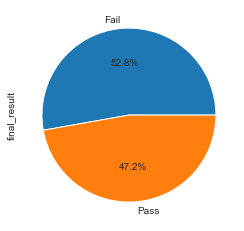

In [50]:
# Pass: Pass và Distinction
#Fail: Fail và Withdrawn

student_info["final_result"] = ["Pass" if student_info.loc[index, "final_result"] in ["Pass","Distinction"] else "Fail" for index in range(student_info.shape[0])]
pie_plot(student_info, "final_result")

tỷ lệ giữa kết quả Pass và Fail cân bằng nên không phải xử lý mất cân bằng dữ liệu

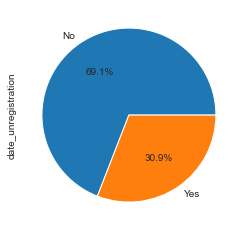

In [51]:
pie_plot(student_info, "date_unregistration")

In [52]:
# Social_Science: AAA, BBB, GGG: các module liên quan đến ngành xã hội
# STEM: CCC, EEE, DDD, FFF: module liên quan đến khoa học, tự nhiên, ứng dụng của toán

student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                 else 'STEM' for i in range(len(student_info))]

In [54]:
# Data Exploring : Missing Values
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        missinginfo = {"ColumnName" : col, "TotalMissingVals" : sum_miss_val, "PercentMissing" : percent_miss_val}
        miss_df = miss_df.append(missinginfo, ignore_index = True)
    
    miss_df = miss_df[miss_df["PercentMissing"] > 0.0]
    miss_df = miss_df.reset_index(drop = True)
    return miss_df

In [56]:
# Data Exploring : Missing Values
miss_df = find_missing_percent(student_info)
print(f"Number of columns with missing values: {miss_df.shape}")
display(miss_df)

Number of columns with missing values: (8, 3)


,ColumnName,TotalMissingVals,PercentMissing
0,imd_band,1111.0,3.41
1,studied_credits,350.0,1.07
2,sum_click,3365.0,10.32
3,After_Click,3365.0,10.32
4,Before_Click,3365.0,10.32
5,Access_Vle,3365.0,10.32
6,date_registration,281.0,0.86
7,Late_submission,6750.0,20.71


In [ ]:
student_info['sum_click']     = student_info['sum_click'].fillna(0)
student_info['After_Click']  = student_info['After_Click'].fillna(0)
student_info['Before_Click'] = student_info['Before_Click'].fillna(0)
student_info["date_registration"] = student_info["date_registration"].fillna(int(student_info["date_registration"].mean()))
student_info["studied_credits"] = student_info["studied_credits"].fillna(int(student_info["studied_credits"].mean()))
student_info["Late_submission"] = student_info["Late_submission"].fillna(student_info["Late_submission"].max())

In [ ]:
student_info["Access_Vle"] = student_info["Access_Vle"].fillna("No")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def mice_imputation_categoric(categoric_data):
 
    label_dict={}
    for col in categoric_data:
        label_dict[col] = LabelEncoder()
        nn_vals = np.array(categoric_data[col][categoric_data[col].notnull()]).reshape(-1,1)
        nn_vals_arr = np.array(label_dict[col].fit_transform(nn_vals)).reshape(-1,)
        categoric_data[col].loc[categoric_data[col].notnull()] = nn_vals_arr

    iter_imp_categoric = IterativeImputer(DecisionTreeClassifier(), max_iter =5, initial_strategy='most_frequent')
    imputed_data = iter_imp_categoric.fit_transform(categoric_data)
    data_categoric_imp = pd.DataFrame(imputed_data, columns =categoric_data.columns,index = categoric_data.index).astype(int)
    
    for col in data_categoric_imp.columns:
        le = label_dict[col]
        data_arr= np.array(data_categoric_imp[col]).reshape(-1,1)
        data_categoric_imp[col] = le.inverse_transform(data_arr)
        
    return data_categoric_imp

In [ ]:
numeric_cols = student_info.select_dtypes(["int","float"]).columns
cate_cols = student_info.select_dtypes(object).columns

In [ ]:
student_info["imd_band"].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20%', '0-10%'], dtype=object)

In [ ]:
student_info[cate_cols] = mice_imputation_categoric(student_info[cate_cols])

In [ ]:
student_info.isnull().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
sum_click                     0
After_Click                   0
Before_Click                  0
Access_Vle                    0
date_registration             0
date_unregistration           0
module_presentation_length    0
Year                          0
Starting_month                0
Late_submission               0
Code_Category                 0
dtype: int64

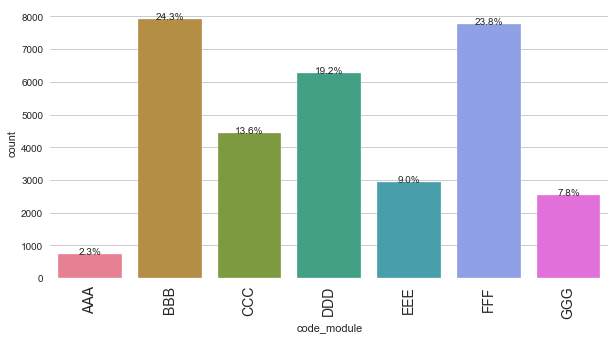

In [ ]:

count_plot(90,0,student_info,"code_module")
plt.show()
stacked_plot(student_info, 'code_module', 'final_result', 'id_student')

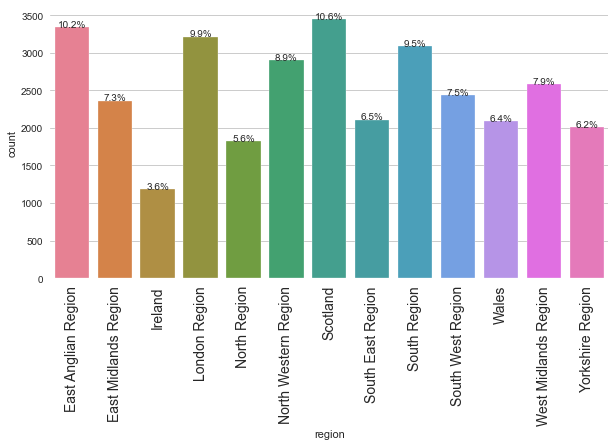

In [ ]:

count_plot(90,0,student_info,"region")
plt.show()
stacked_plot(student_info, 'region', 'final_result', 'id_student')

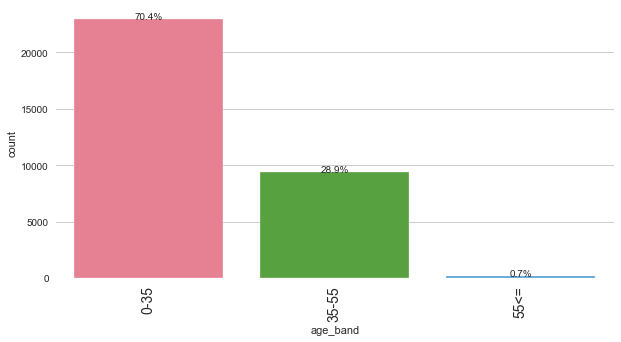

In [ ]:
stacked_plot(student_info, 'age_band', 'final_result', 'id_student')
count_plot(90,0,student_info,"age_band")

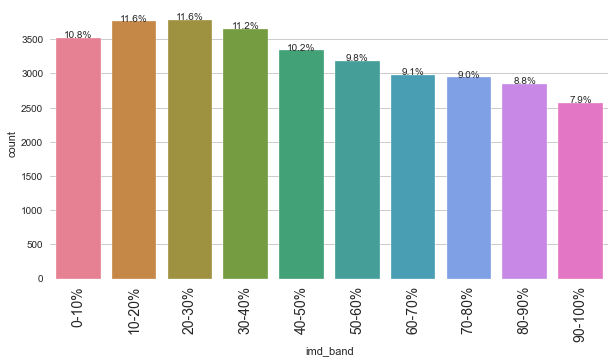

In [ ]:
stacked_plot(student_info, 'imd_band', 'final_result', 'id_student')
count_plot(90,0,student_info,"imd_band")

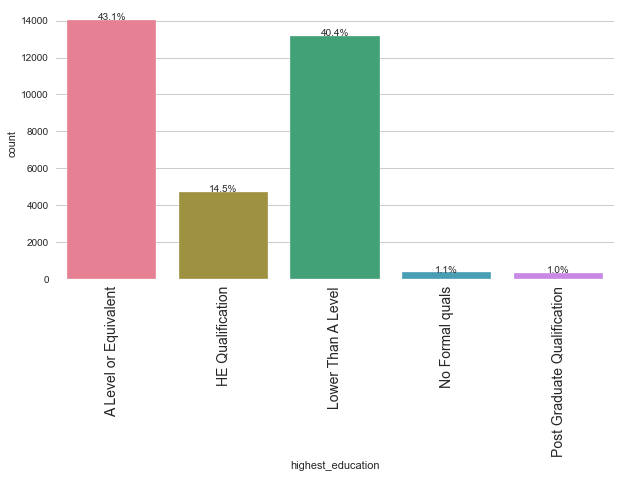

In [ ]:
count_plot(90,0,student_info,"highest_education")
stacked_plot(student_info, 'highest_education', 'final_result', 'id_student')

In [ ]:
student_info["highest_education"] = [ "A Level" if level == 'A Level or Equivalent' else "Higher than A level" if level in ['HE Qualification','Post Graduate Qualification'] \
                                     else "Lower than A level" for level in student_info["highest_education"]]

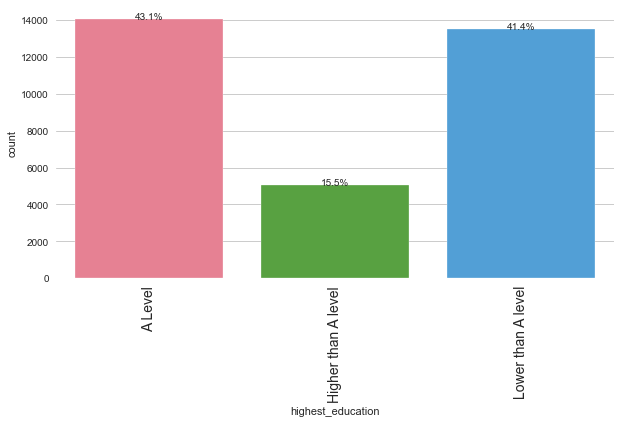

In [ ]:
count_plot(90,0,student_info,"highest_education")
stacked_plot(student_info, 'highest_education', 'final_result', 'id_student')

In [ ]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'After_Click', 'Before_Click', 'Access_Vle', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'Year',
       'Starting_month', 'Late_submission', 'Code_Category'],
      dtype='object')

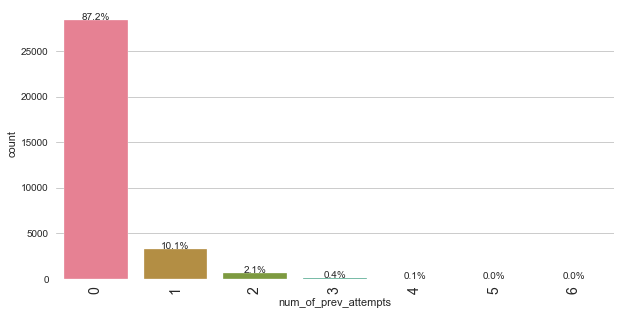

In [ ]:
count_plot(90,0,student_info,"num_of_prev_attempts")
stacked_plot(student_info, 'num_of_prev_attempts', 'final_result', 'id_student')

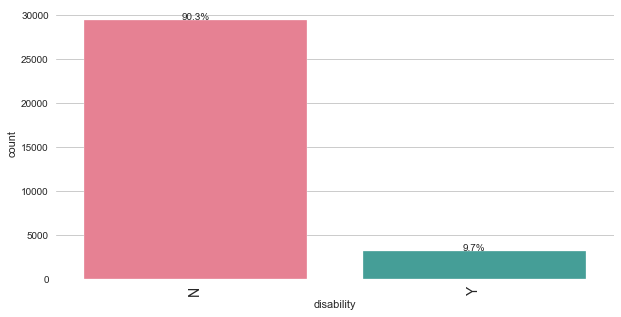

In [ ]:

stacked_plot(student_info, 'disability', 'final_result', 'id_student')
count_plot(90,0,student_info,"disability")

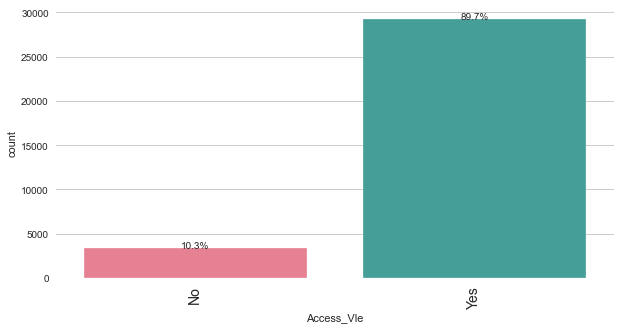

In [ ]:
stacked_plot(student_info, 'Access_Vle', 'final_result', 'id_student')
count_plot(90,0,student_info,"Access_Vle")

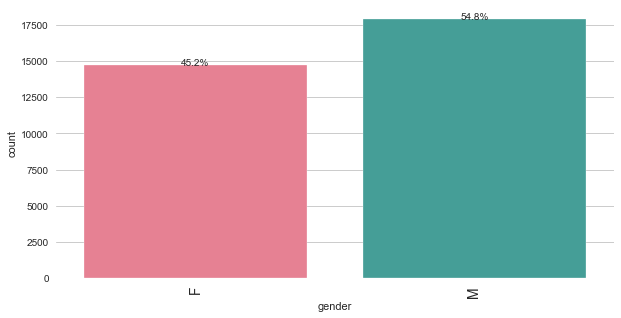

In [ ]:
stacked_plot(student_info, 'gender', 'final_result', 'id_student')
count_plot(90,0,student_info,"gender")

### Chúng ta phân tích số lượt tương tác của học viên với VLE để thấy thói quen học tập của học viên dựa theo kết quả, độ tuổi, trình độ học vấn

<AxesSubplot:ylabel='final_result'>

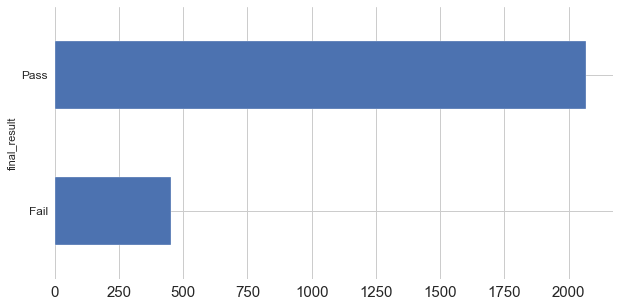

In [ ]:
# Biều đồ thể hiện lượt tương tác trung bình với Vle theo kết quả học tập
plt.figure(figsize = (10, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

tương tác trung bình của những sinh viên có kết quả đạt khoảng 2100, học viên có kết quả là Fail với 600 lượt tương tác. Có sự chênh lệch lớn, qua đố phản ánh về hành vi học tập ảnh hưởng đến kết quả.

<AxesSubplot:ylabel='highest_education'>

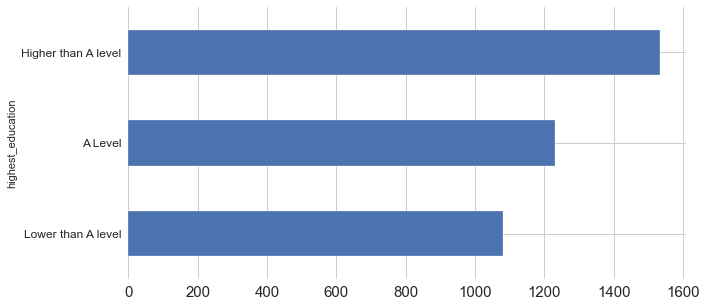

In [ ]:
# Biều đồ thể hiện lượt tương tác trung bình với Vle theo nhóm tuổi
plt.figure(figsize = (10, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['highest_education'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

mức độ tương tác với VLE giàm dần đúng với trình độ sinh viên, sinh viên có trình độ học vấn cao hơn có lượt tương tác với thư viện nhiều hơn. Chia lại thành 3 nhóm trình độ: A level, Lower than A level, Higher than A level

<AxesSubplot:ylabel='highest_education'>

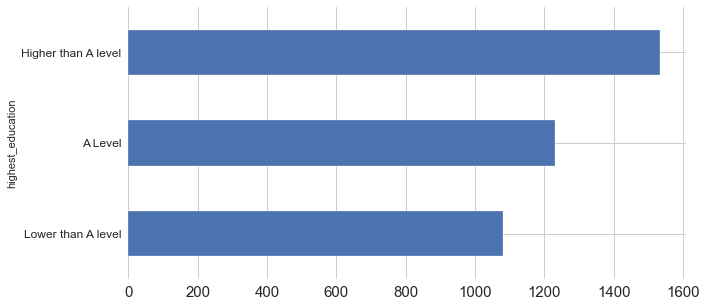

In [ ]:
# Biều đồ thể hiện lượt tương tác trung bình với Vle theo nhóm tuổi
plt.figure(figsize = (10, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['highest_education'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

<AxesSubplot:ylabel='age_band'>

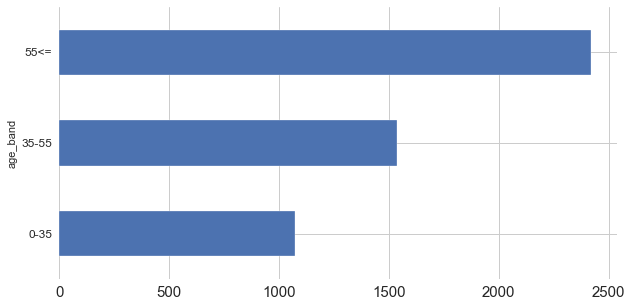

In [ ]:
# Biều đồ thể hiện lượt tương tác trung bình với Vle theo nhóm tuổi
plt.figure(figsize = (10, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['age_band'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

Nhận xét: học viên thuộc nhóm tuổi >= 55 trung bình 1 học viên tương tác với VLE hơn 2500 lượt, nhóm tuổi 35-55 tuổi khoảng 1700 lượt, thấp nhất học viên nhóm tuổi 0-35 tuổi thấp nhất 1200 lượt. Qua đó thấy rằng học viên lớn tuổi chăm chỉ tìm đọc tài liệu, ý thức học tập tốt hơn so với các học viên kém tuổi hơn

<AxesSubplot:ylabel='imd_band'>

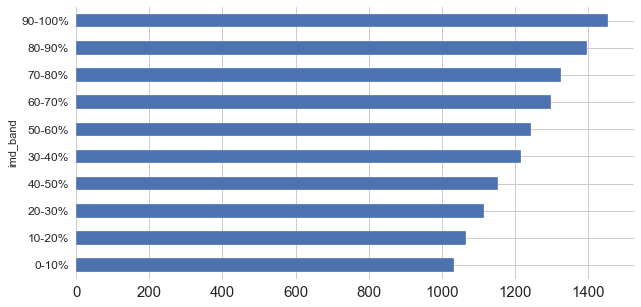

In [ ]:
# Biều đồ thể hiện lượt tương tác trung bình với Vle theo điều kiện sinh hoạt
plt.figure(figsize = (10, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
plt.style.use('seaborn')
student_info.groupby(['imd_band'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

học viên có điều kiện sinh hoạt khó khăn hơn có lượt tương tác với VLE nhiều hơn, họ có ý thức học tập tốt hơn

<AxesSubplot:ylabel='final_result'>

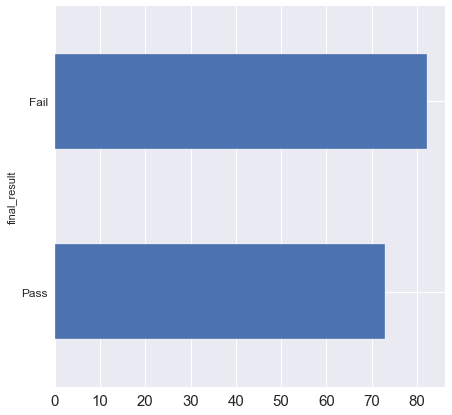

In [ ]:
plt.figure(figsize = (7,7))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['final_result'])['studied_credits'].mean().sort_values(ascending = True).plot(kind='barh')

thấy số tín chỉ học tập ảnh hưởng đến kết quả sinh viê, những học viên có kết quả học tập Fail có lượng tín chỉ học cao hơn so với học viên có kq Pass

<AxesSubplot:ylabel='gender'>

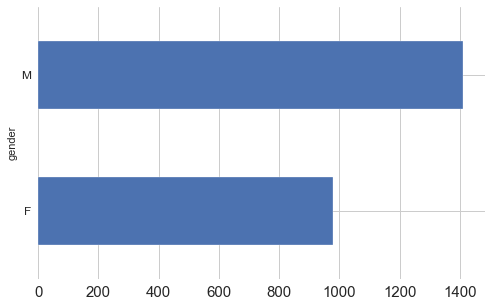

In [ ]:
plt.figure(figsize = (8, 5))
plt.xticks(rotation=0, fontsize=15)
plt.yticks(rotation=0, fontsize=12)
sns.set_style("whitegrid")
student_info.groupby(['gender'])['sum_click'].mean().sort_values(ascending = True).plot(kind='barh')

In [ ]:
# Social_Science: AAA, BBB, GGG: các module liên quan đến ngành xã hội
# STEM: CCC, EEE, DDD, FFF: module liên quan đến khoa học, tự nhiên, ứng dụng của toán

student_info['Code_Category'] = ['Social_Science' if student_info['code_module'].iloc[i] in ['AAA', 'BBB', 'GGG']
                                 else 'STEM' for i in range(len(student_info))]

In [ ]:
student_info.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click',
       'After_Click', 'Before_Click', 'Access_Vle', 'date_registration',
       'date_unregistration', 'module_presentation_length', 'Year',
       'Starting_month', 'Late_submission', 'Code_Category'],
      dtype='object')

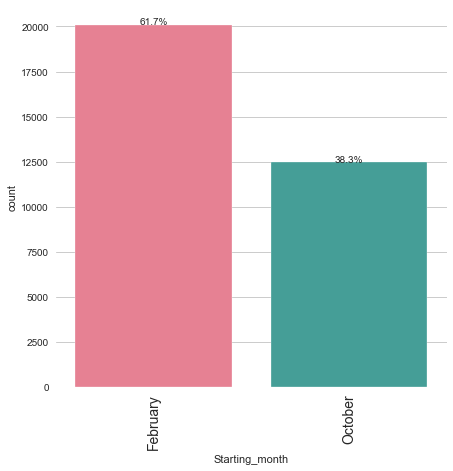

In [ ]:
count_plot(90, 0, student_info, 'Starting_month', plot_size = (7,7))
plt.show()
stacked_plot(student_info, 'Starting_month', 'final_result', 'id_student')

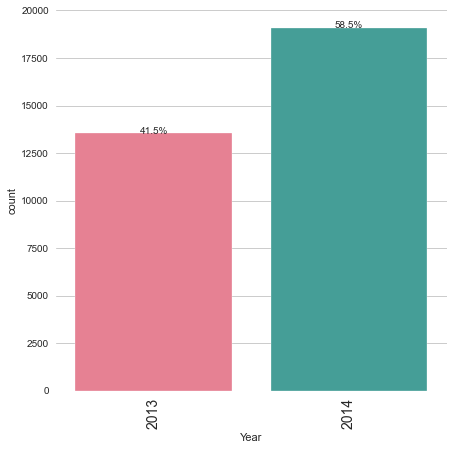

In [ ]:
count_plot(90, 0, student_info, 'Year', plot_size = (7,7))
plt.show()
stacked_plot(student_info, 'Year', 'final_result', 'id_student')

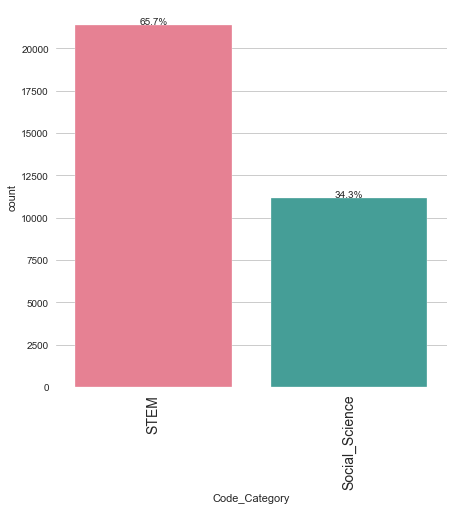

In [ ]:
count_plot(90, 0, student_info, 'Code_Category', plot_size = (7,7))
plt.show()
stacked_plot(student_info, 'Code_Category', 'final_result', 'id_student')


các module học thuộc nhóm STEM có tỷ lệ Fail cao hơn, có thể do những module thuộc nhóm STEM khó hơn so với module thuộc nhóm Social_Science

In [ ]:
student_info["learn_again"] = ["Yes" if learn > 0 else "No" for learn in student_info["num_of_prev_attempts"] ]

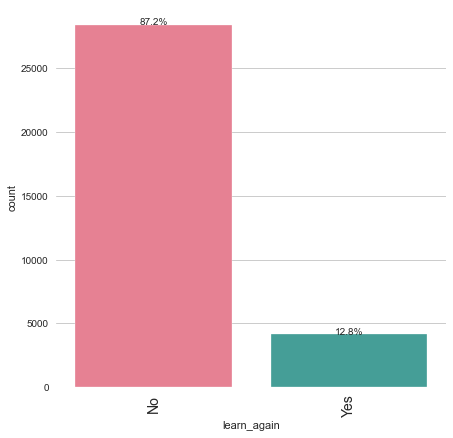

In [ ]:
count_plot(90, 0, student_info, 'learn_again', plot_size = (7,7))
plt.show()
stacked_plot(student_info, 'learn_again', 'final_result', 'id_student')

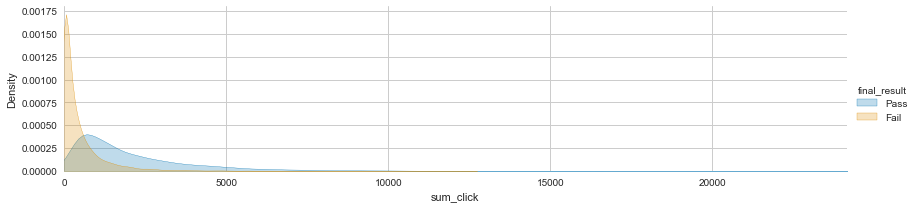

In [ ]:
# Blood Pressure
fig = sns.FacetGrid(student_info, hue="final_result", aspect=4, palette='colorblind')
fig.map(sns.kdeplot, 'sum_click', shade = True)
oldest = student_info["sum_click"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show();

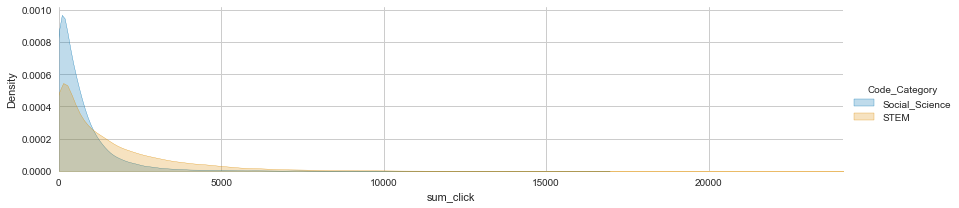

In [ ]:
# Blood Pressure
fig = sns.FacetGrid(student_info, hue="Code_Category", aspect=4, palette='colorblind')
fig.map(sns.kdeplot, 'sum_click', shade = True)
oldest = student_info["sum_click"].max()
fig.set(xlim=(0, oldest))
fig.add_legend()
plt.show();

In [ ]:
numeric_cols = student_info.select_dtypes(["int","float"]).columns
numeric_cols

Index(['id_student', 'num_of_prev_attempts', 'studied_credits', 'sum_click',
       'After_Click', 'Before_Click', 'date_registration',
       'module_presentation_length', 'Late_submission'],
      dtype='object')

In [ ]:
# stop

In [ ]:
col = ["sum_click","Late_submission","final_result"]

In [ ]:
col = ["sum_click", "studied_credits","date_registration", 'Late_submission', "Code_Category", "final_result","num_of_prev_attempts"]

<Figure size 2160x1440 with 0 Axes>

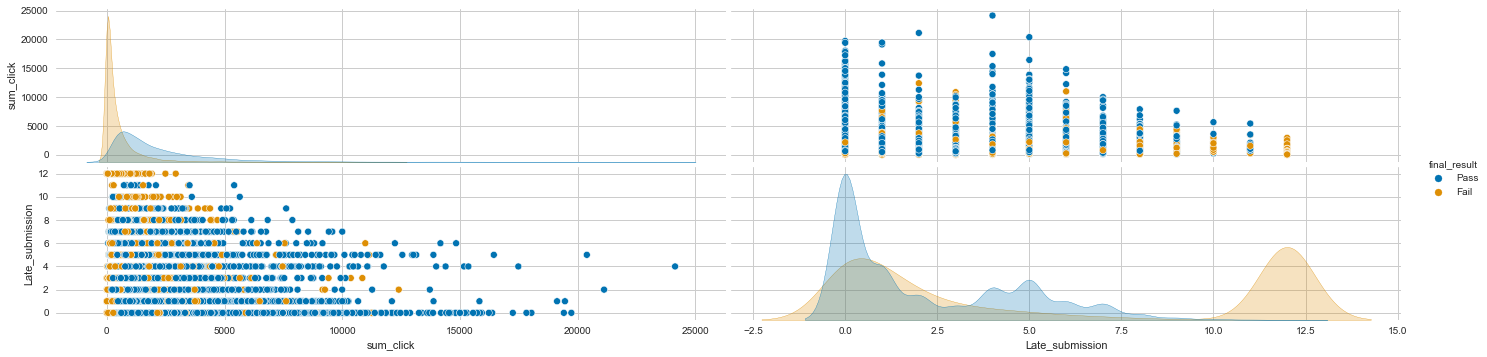

In [ ]:
plt.figure(figsize = (30,20))
sns.pairplot(student_info[col], hue = "final_result", aspect=4, palette='colorblind')
plt.show();

<Figure size 2160x1440 with 0 Axes>

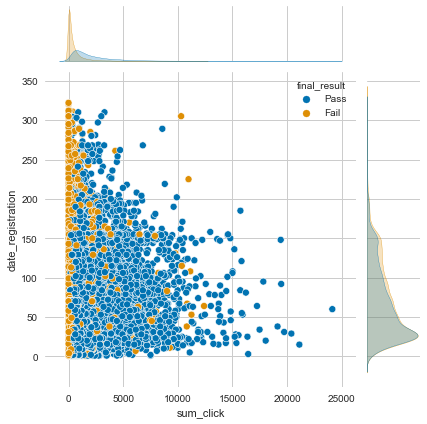

In [ ]:
plt.figure(figsize = (30,20))
sns.jointplot(data = student_info, hue = "final_result", x = "sum_click", y = "date_registration", palette='colorblind')
plt.show();

In [ ]:
student_info.to_csv("student_info.csv")

In [ ]:
student_info.columns

In [ ]:
df1 = student_info[student_info["sum_click"] >= 5000]
df2 = df1[df1["final_result"] == "Fail"]
display(df2.head())
df2.shape

In [ ]:
df2["date_unregistration"].value_counts()

In [ ]:
df3 = df2[df2["date_unregistration"] == "0"]
display(df3.head())

In [ ]:
id_list = df3["id_student"].unique()
for id in id_list:
    display(std_assessment_merge_assessment[std_assessment_merge_assessment["id_student"] == id])

In [ ]:
vle_std_merge_vle[vle_std_merge_vle["id_student"] == 1733664]

In [ ]:
vle_std_merge_vle

In [ ]:
id_list = df3["id_student"].unique()
for id in id_list:
    display(vle_std_merge_vle_group_activity[vle_std_merge_vle_group_activity["id_student"] == id])

In [ ]:
df2["final_result"].value_counts